Hey guys!

In "External Data Disclosure Thread", I just found an intersting external dataset of weather data:
https://www.kaggle.com/selfishgene/historical-hourly-weather-data

After comparing the dataset with competition ones, amazingly I found those corresponding cites for most sites (not exact but at least very close).

Hope this helps and look forward to more findings!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/historical-hourly-weather-data/humidity.csv
/kaggle/input/historical-hourly-weather-data/wind_speed.csv
/kaggle/input/historical-hourly-weather-data/wind_direction.csv
/kaggle/input/historical-hourly-weather-data/city_attributes.csv
/kaggle/input/historical-hourly-weather-data/weather_description.csv
/kaggle/input/historical-hourly-weather-data/pressure.csv
/kaggle/input/historical-hourly-weather-data/temperature.csv
/kaggle/input/ashrae-energy-prediction/test.csv
/kaggle/input/ashrae-energy-prediction/weather_train.csv
/kaggle/input/ashrae-energy-prediction/train.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv
/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/building_metadata.csv


In [2]:
# merge weather_train & weather_test
weather_train = pd.read_csv('../input/ashrae-energy-prediction/weather_train.csv')
weather_test = pd.read_csv('../input/ashrae-energy-prediction/weather_test.csv')
weather_merged = weather_train.append(weather_test)
weather_merged['timestamp'] = pd.to_datetime(weather_merged['timestamp'])
weather_merged.set_index('timestamp', inplace=True)

weather_merged

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,15,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
2018-12-31 20:00:00,15,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
2018-12-31 21:00:00,15,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2


In [3]:
#extract temperature from weather data
df_temperature_pivot = weather_merged.reset_index().pivot_table(index='timestamp', columns='site_id', values='air_temperature')
df_temperature_pivot.columns = 'site_'+df_temperature_pivot.columns.astype('str')

df_temperature_pivot

site_id,site_0,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,25.0,3.8,15.6,10.0,NaN,NaN,NaN,-1.8,25.0,NaN,NaN,-1.8,1.9,-8.3,NaN,NaN
2016-01-01 01:00:00,24.4,3.7,13.9,9.4,9.4,5.0,10.0,-1.7,24.4,10.0,-10.6,-1.7,1.6,-8.3,5.6,-1.0
2016-01-01 02:00:00,22.8,2.6,13.3,8.9,8.3,3.0,10.0,-2.7,22.8,10.0,-11.1,-2.7,0.7,-7.8,5.6,-1.0
2016-01-01 03:00:00,21.1,2.0,12.2,7.8,7.8,4.0,9.4,-2.3,21.1,10.0,-10.0,-2.3,0.8,-7.8,5.6,-1.0
2016-01-01 04:00:00,20.0,2.3,11.7,7.8,5.0,4.0,7.8,-2.6,20.0,10.0,-13.3,-2.6,2.9,-7.2,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,27.8,9.0,9.4,8.3,13.3,9.0,6.1,-0.8,27.8,16.1,-3.9,-0.8,9.5,-2.8,7.2,3.3
2018-12-31 20:00:00,27.2,8.9,11.1,8.3,13.9,9.0,6.7,-1.2,27.2,16.7,-2.8,-1.2,9.5,-3.3,6.7,2.8
2018-12-31 21:00:00,27.8,9.1,8.3,8.3,14.4,9.0,6.7,-1.4,27.8,17.2,-3.3,-1.4,9.5,-3.9,6.1,2.8


In [4]:
#load external temperature data
temperature_external = pd.read_csv("../input/historical-hourly-weather-data/temperature.csv")
temperature_external['datetime'] = pd.to_datetime(temperature_external['datetime'])
temperature_external.set_index('datetime', inplace=True)
temperature_external = temperature_external-273.15
temperature_external = temperature_external.merge(df_temperature_pivot, left_index=True, right_index=True, how='inner')
temperature_external = temperature_external.dropna()

temperature_external

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
2016-01-01 01:00:00,-1.069921,1.560000,9.210000,2.780000,14.990000,14.870000,6.650000,14.120000,-1.180000,-8.260000,...,10.0,-1.7,24.4,10.0,-10.6,-1.7,1.6,-8.3,5.6,-1.0
2016-01-01 02:00:00,-1.800000,-0.633925,7.886930,-0.071831,8.414463,8.362194,1.023518,8.404841,-9.428313,-13.231024,...,10.0,-2.7,22.8,10.0,-11.1,-2.7,0.7,-7.8,5.6,-1.0
2016-01-01 03:00:00,-1.944679,0.380000,6.010000,-0.140000,11.120000,11.300000,4.940000,9.590000,-5.420000,-10.330000,...,9.4,-2.3,21.1,10.0,-10.0,-2.3,0.8,-7.8,5.6,-1.0
2016-01-01 12:00:00,-3.910000,-0.036979,2.221332,-3.279886,5.467968,6.788838,-1.203947,0.980000,-6.615663,-14.807837,...,4.4,-3.1,18.9,6.7,-13.3,-3.1,7.9,-8.9,2.8,-1.0
2016-01-01 13:00:00,-4.060000,-0.260000,2.020000,-3.210000,4.990000,6.650000,-2.060000,0.880000,-6.560000,-14.940000,...,5.0,-2.1,20.0,6.7,-12.8,-2.1,7.0,-9.4,2.8,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-27 20:00:00,13.290000,20.690000,23.910000,13.000000,26.840000,26.240000,25.280000,29.000000,11.220000,4.110000,...,20.6,10.6,24.4,13.9,15.0,10.6,7.7,1.1,17.2,16.7
2017-10-27 21:00:00,14.720000,21.700000,25.990000,14.990000,28.170000,26.550000,26.280000,30.500000,12.740000,4.770000,...,21.1,10.6,25.0,14.4,15.0,10.6,8.5,0.6,16.7,16.7
2017-10-27 22:00:00,15.270000,22.420000,27.410000,16.290000,28.450000,27.010000,27.410000,31.330000,13.250000,4.870000,...,18.9,9.8,23.3,16.1,15.0,9.8,8.4,1.1,15.6,15.0
2017-10-27 23:00:00,15.500000,21.840000,27.910000,17.440000,28.610000,27.620000,27.660000,31.800000,13.740000,4.540000,...,16.7,8.8,21.7,14.4,15.0,8.8,8.4,1.1,13.3,13.9


In [5]:
#calculate correlations between sites
df_corr = temperature_external.corr(method='spearman')
list_site = df_temperature_pivot.columns
df_corr = df_corr[list_site]
df_corr = df_corr.drop(list_site)
df_corr

,site_0,site_1,site_2,site_3,site_4,site_5,site_6,site_7,site_8,site_9,site_10,site_11,site_12,site_13,site_14,site_15
Vancouver,0.615444,0.619651,0.866415,0.772184,0.701665,0.630863,0.737928,0.801610,0.615444,0.747032,0.870235,0.801610,0.552487,0.823696,0.759835,0.733739
Portland,0.575062,0.555090,0.844950,0.723380,0.741953,0.567943,0.691877,0.746184,0.575062,0.714286,0.841767,0.746184,0.491765,0.757884,0.710027,0.680724
San Francisco,0.572375,0.398174,0.801401,0.631520,0.928470,0.406646,0.628819,0.617460,0.572375,0.687844,0.743832,0.617460,0.335853,0.632978,0.617740,0.584361
Seattle,0.594229,0.562409,0.852540,0.737610,0.743123,0.579189,0.706477,0.760704,0.594229,0.726165,0.846936,0.760704,0.504307,0.774915,0.724254,0.694041
Los Angeles,0.599551,0.432334,0.826330,0.656094,0.797104,0.446988,0.645201,0.640615,0.599551,0.678037,0.736779,0.640615,0.374496,0.644978,0.644312,0.611650
San Diego,0.617290,0.443126,0.806399,0.648905,0.772024,0.454495,0.641452,0.632050,0.617290,0.673529,0.725038,0.632050,0.387540,0.637378,0.640809,0.604350
Las Vegas,0.621061,0.621719,0.936973,0.772149,0.717224,0.629419,0.740554,0.777213,0.621061,0.768004,0.910818,0.777213,0.555416,0.812213,0.754563,0.722368
Phoenix,0.647458,0.581391,0.978918,0.761693,0.759331,0.590431,0.737338,0.769599,0.647458,0.784783,0.887340,0.769599,0.517219,0.798481,0.747951,0.713222
Albuquerque,0.637752,0.565264,0.891332,0.728705,0.705381,0.562833,0.717798,0.739233,0.637752,0.828393,0.841767,0.739233,0.498249,0.791136,0.718093,0.694217
Denver,0.625123,0.597953,0.846993,0.711150,0.653187,0.594677,0.696140,0.722585,0.625123,0.774938,0.862870,0.722585,0.539134,0.811486,0.700487,0.671330


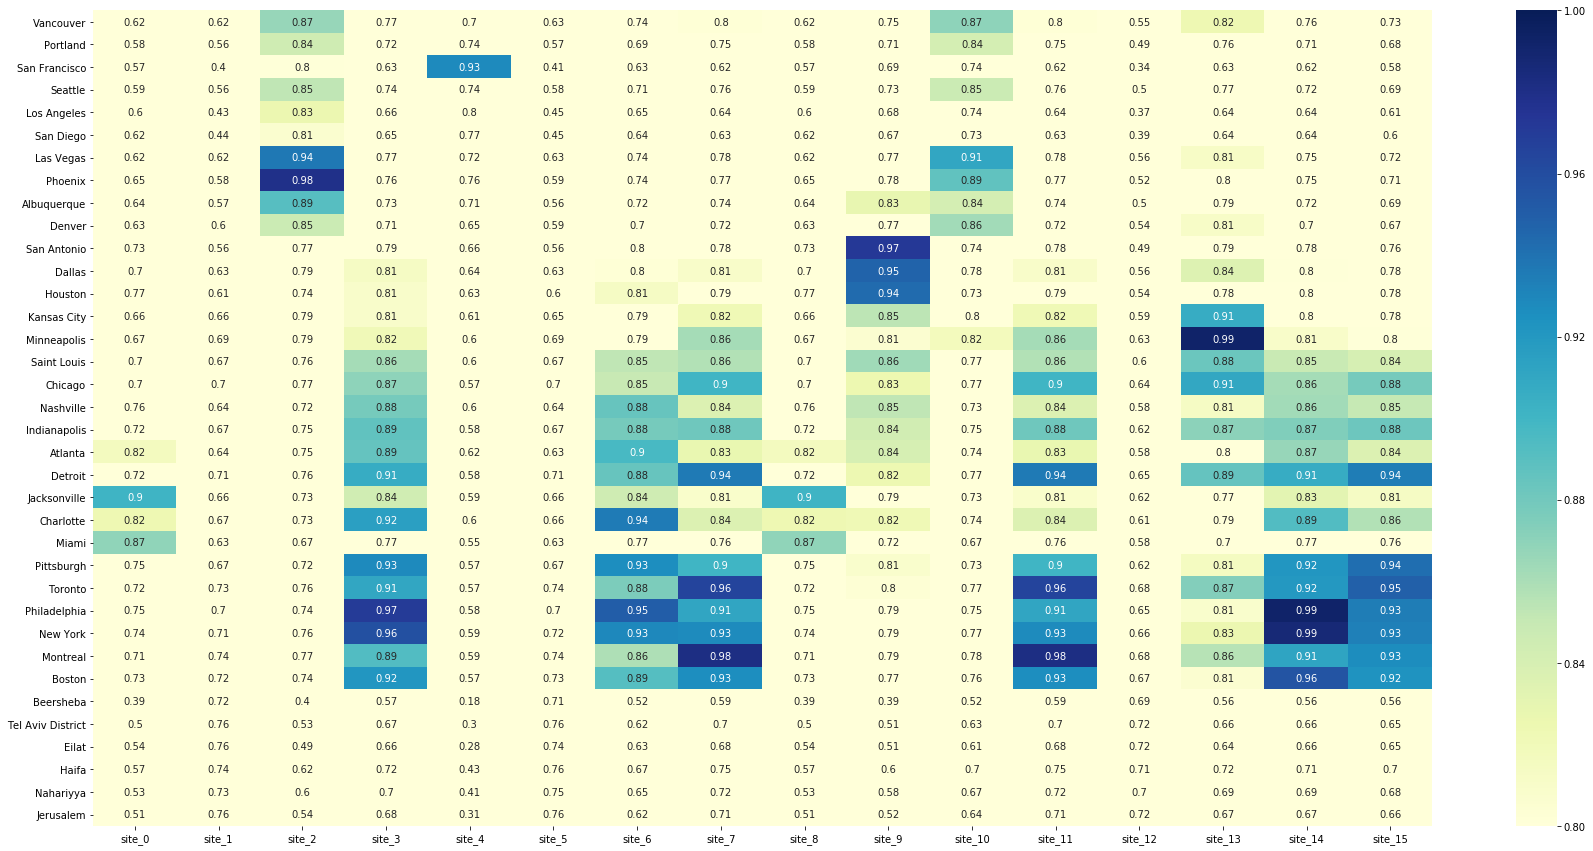

In [6]:
#sns heat map
fig, ax = plt.subplots(figsize=(30,15))   
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", vmin=0.8, vmax=1.0)

In [7]:
#Get cities!
df_findCity = pd.concat([df_corr.idxmax(),df_corr.max()], axis=1).reset_index().rename(columns={'index':'site',0:'city',1:'corr'})
df_findCity

,site,city,corr
0,site_0,Jacksonville,0.901336
1,site_1,Eilat,0.764881
2,site_2,Phoenix,0.978918
3,site_3,Philadelphia,0.971013
4,site_4,San Francisco,0.928470
5,site_5,Jerusalem,0.759537
6,site_6,Philadelphia,0.950329
7,site_7,Montreal,0.981901
8,site_8,Jacksonville,0.901336
9,site_9,San Antonio,0.972106


City: Jacksonville
Site: site_0


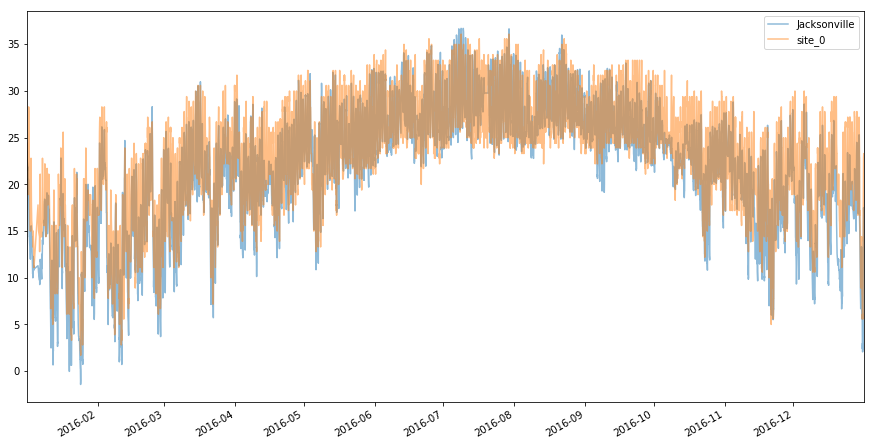

City: Phoenix
Site: site_2


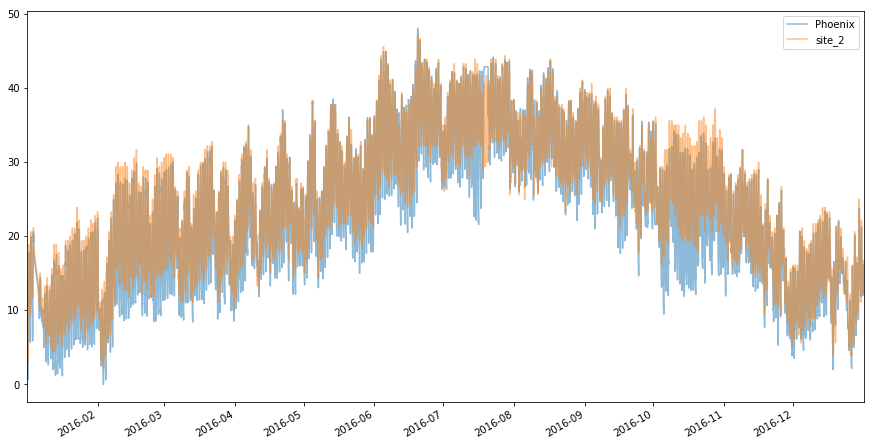

City: Philadelphia
Site: site_3


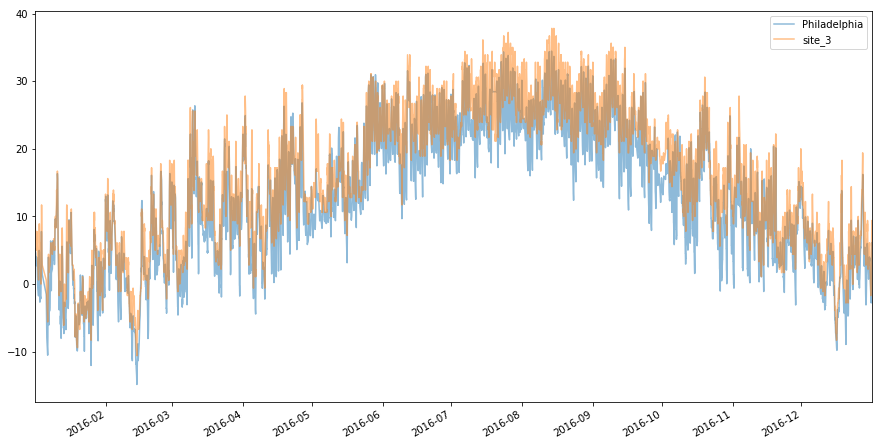

City: San Francisco
Site: site_4


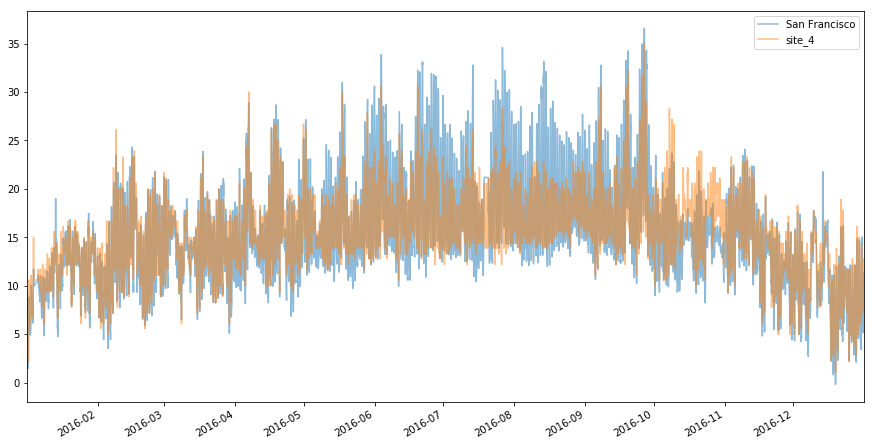

City: Philadelphia
Site: site_6


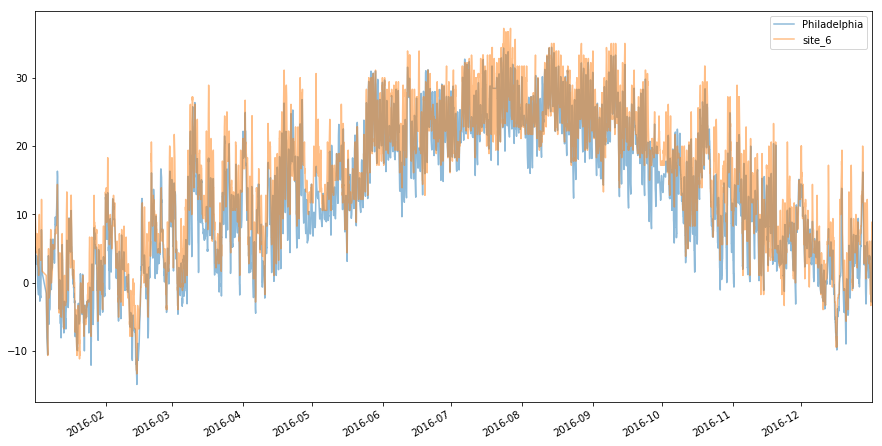

City: Montreal
Site: site_7


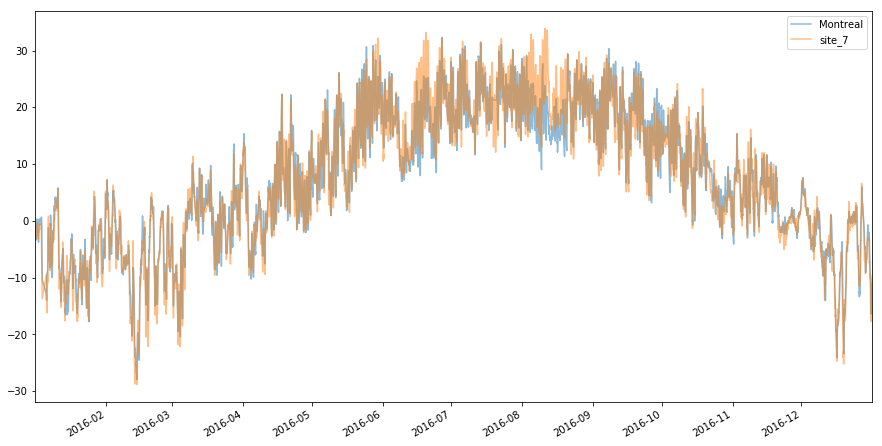

City: Jacksonville
Site: site_8


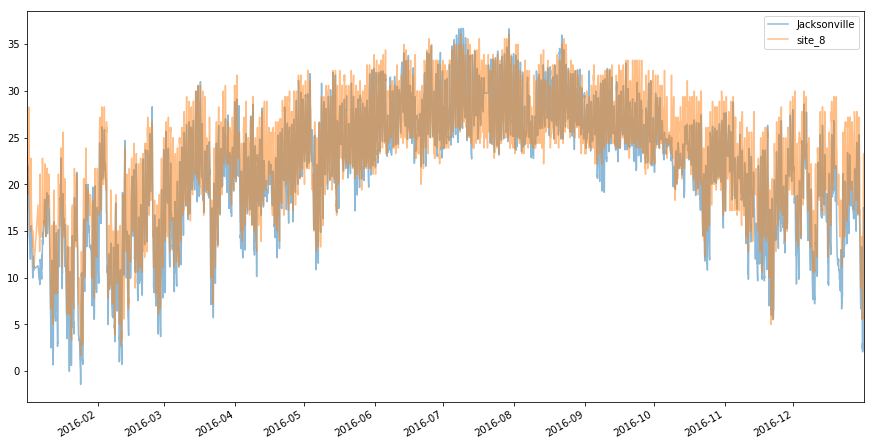

City: San Antonio
Site: site_9


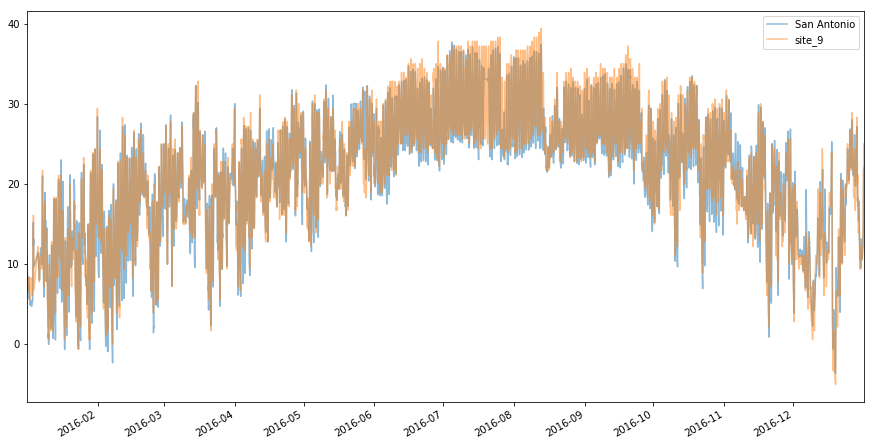

City: Las Vegas
Site: site_10


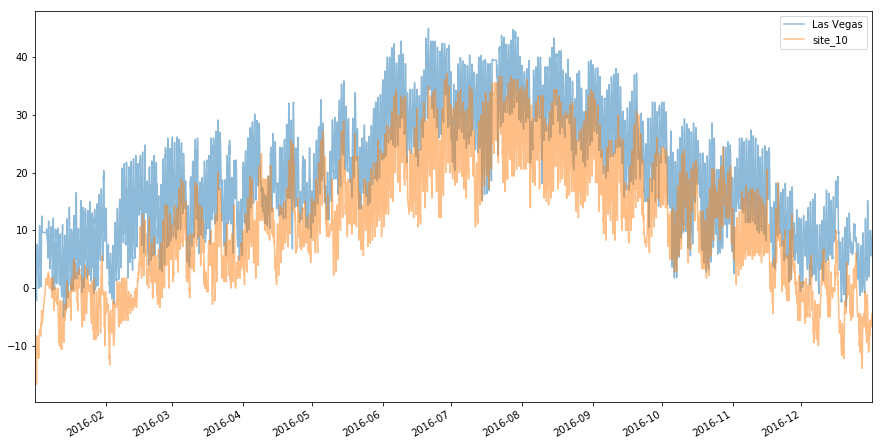

City: Montreal
Site: site_11


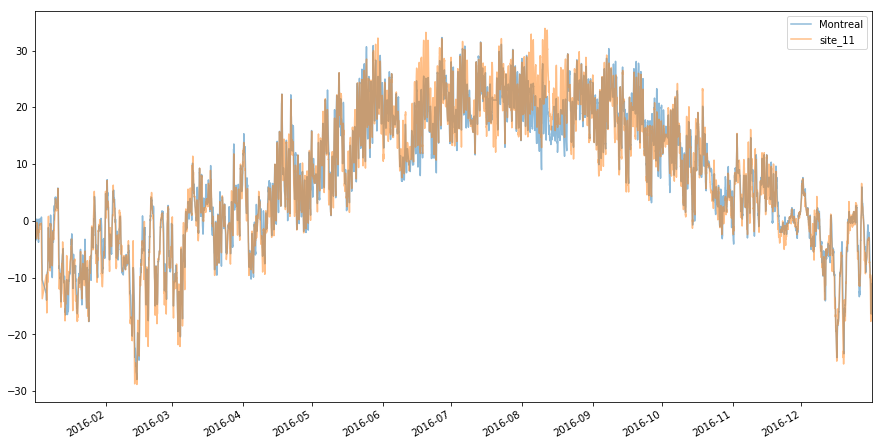

City: Minneapolis
Site: site_13


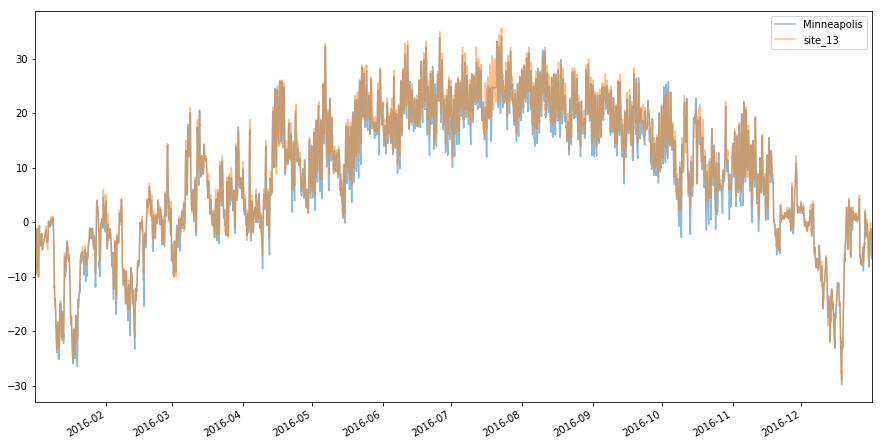

City: Philadelphia
Site: site_14


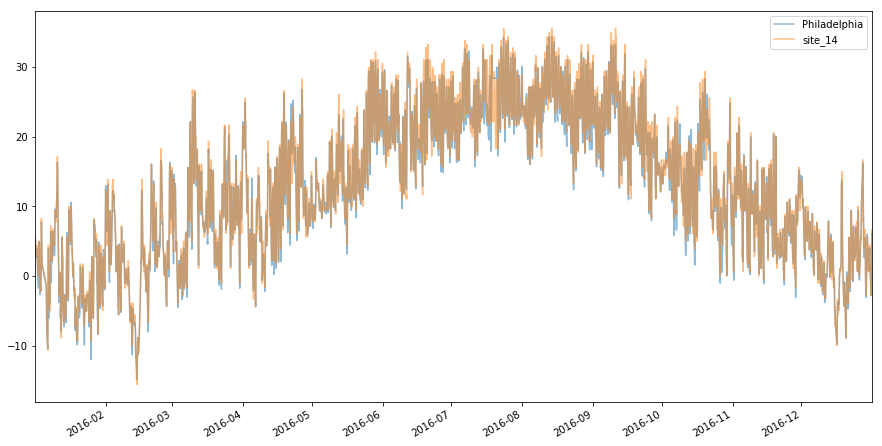

City: Toronto
Site: site_15


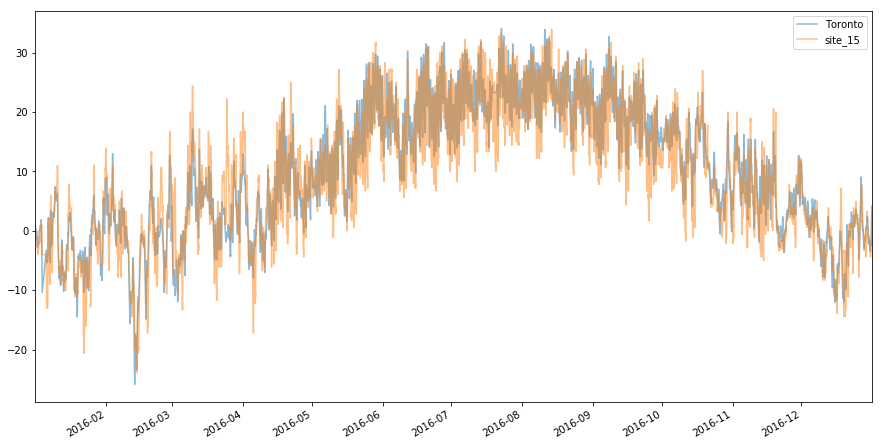

In [8]:
#compare sites & cities in plot
for city, site, corr in zip(df_findCity['city'],df_findCity['site'],df_findCity['corr']):
    if corr > 0.9:
        print('City: ' + city)
        print('Site: ' + site)   
        temperature_external[[city,site]].loc['2016'].plot(figsize=(15,8), alpha=0.5)
        plt.show()        

According to some discussion and study:

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/114483#661205

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113772#661207

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/114874

US sites: 0,2,3,4,6,8,9,10,13,14,15

EU sites: 1,5,12

CA sites: 7,11

Make some correction, and the summary about countries/cities is as following:

(Cities might not be 100% correct, probably just nearby)
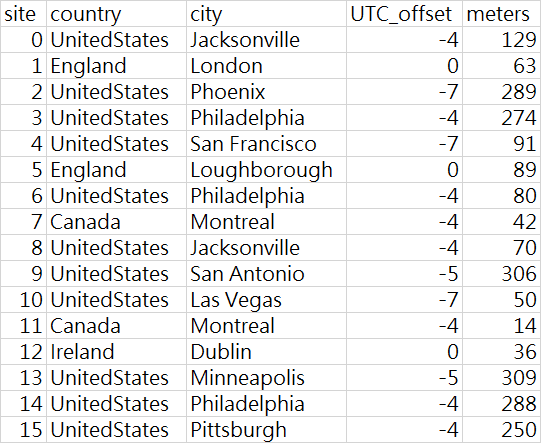